In [5]:
%pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/11.0 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.0 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.0 MB 1.3 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.0 MB 1.4 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.0 MB 1.5 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.0 MB 1.4 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/11.0 MB 1.4 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.0 MB 1.4 MB/s eta 0:00:06
   ----------- ---------------------------- 3.1/11.0 MB 1.4 MB/s eta 0:00:06
   ---------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\acer_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
# 9. Uber Ride Price Prediction using PCA and EDA: Dataset can be change(iris dataset)
# ● Perform Exploratory Data Analysis (EDA) on Uber ride data
# ● Use Principal Component Analysis (PCA) to reduce dimensionality
# ● Compare the performance of models with and without PCA
# 10. Uber Ride Price Prediction using PCA and EDA: Dataset can be change(iris dataset)
# ● Perform Exploratory Data Analysis (EDA) on Uber ride data
# ● Use Principal Component Analysis (PCA) to reduce dimensionality
# ● Evaluate models using metrics like R2, RMSE, MAE

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import radians, cos, sin, asin, sqrt

# Set plot style for better visualizations
sns.set_theme(style="whitegrid")



Matplotlib is building the font cache; this may take a moment.


In [8]:
# Update this variable with your EXACT filename.
# If it's in the same folder, just the name is enough.
filename = "uber_9_10.xls" 

try:
    # Try reading as CSV first (most common for this dataset)
    df = pd.read_csv(filename)
    print(f"Successfully loaded '{filename}' as CSV.")
except Exception as e_csv:
    try:
        # If CSV fails, try reading as Excel (requires openpyxl or xlrd installed)
        print(f"CSV load failed ({e_csv}), trying as Excel...")
        df = pd.read_excel(filename)
        print(f"Successfully loaded '{filename}' as Excel.")
    except Exception as e_xls:
        print(f"\nError: Could not load file '{filename}'.")
        print("Make sure the file is in the same folder as this notebook.")
        print(f"CSV Error: {e_csv}")
        print(f"Excel Error: {e_xls}")

if 'df' in locals():
    print("\nInitial Data Info:")
    df.info()

Successfully loaded 'uber_9_10.xls' as CSV.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
if 'df' in locals():
    print("Cleaning data...")
    df.dropna(inplace=True)
    
    # Basic filters for valid uber rides
    df = df[df['fare_amount'] > 0]
    df = df[df['passenger_count'].between(1, 6)]
    
    print("\nData after cleaning:")
    df.info()
    display(df.head())

Cleaning data...

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 199268 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199268 non-null  int64  
 1   key                199268 non-null  object 
 2   fare_amount        199268 non-null  float64
 3   pickup_datetime    199268 non-null  object 
 4   pickup_longitude   199268 non-null  float64
 5   pickup_latitude    199268 non-null  float64
 6   dropoff_longitude  199268 non-null  float64
 7   dropoff_latitude   199268 non-null  float64
 8   passenger_count    199268 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.2+ MB


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
def haversine(lat1, lon1, lat2, lon2):
    """Calculates distance between two lat/lon points in km."""
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    return R * c

if 'df' in locals():
    print("Feature Engineering...")
    # Convert timestamps
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    
    # Extract time features
    df['hour'] = df['pickup_datetime'].dt.hour
    df['day'] = df['pickup_datetime'].dt.day
    df['month'] = df['pickup_datetime'].dt.month
    df['weekday'] = df['pickup_datetime'].dt.weekday
    
    # Calculate ride distance
    df['distance_km'] = df.apply(lambda row: haversine(row['pickup_latitude'], 
                                                       row['pickup_longitude'], 
                                                       row['dropoff_latitude'], 
                                                       row['dropoff_longitude']), axis=1)
    
    # Filter out 0 distance rides (errors/cancelled)
    df = df[df['distance_km'] > 0]
    print("Done.")
    display(df.head())

Feature Engineering...
Done.


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3,4.475450


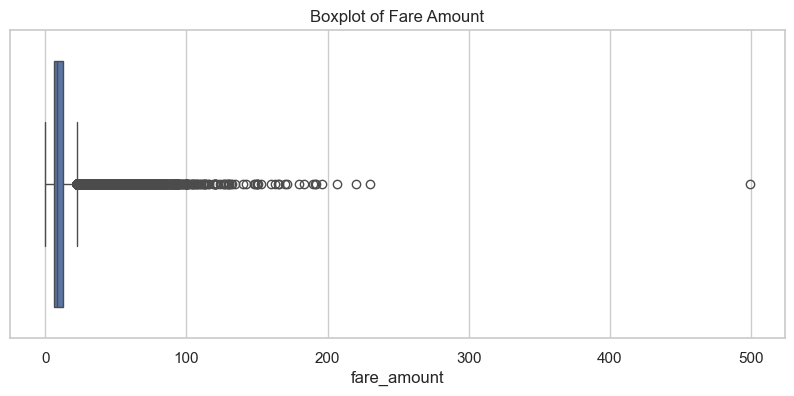

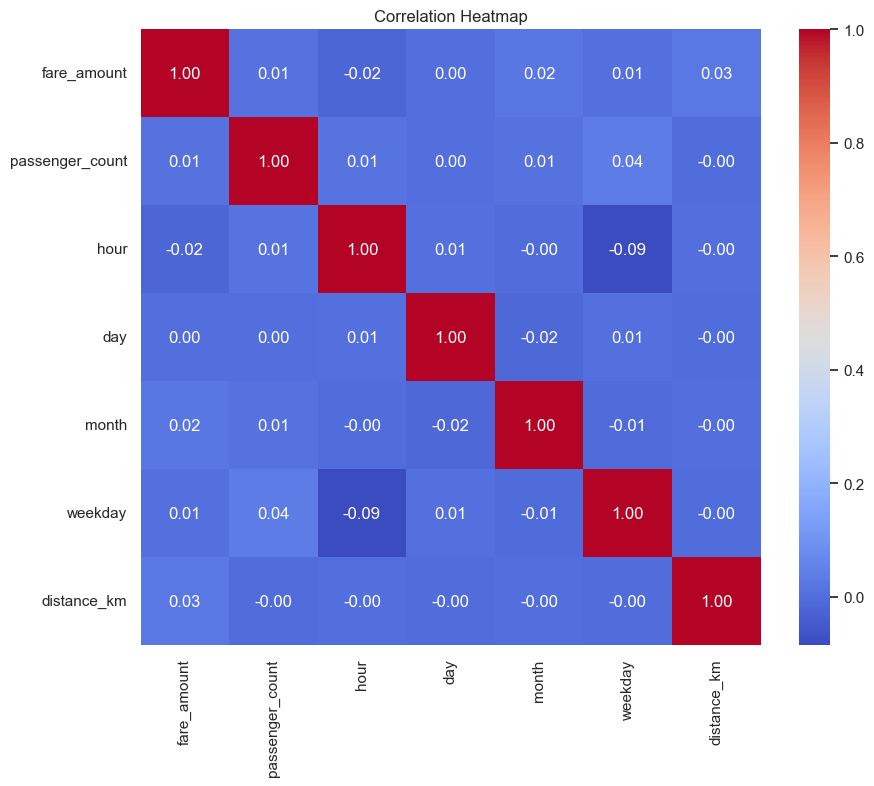

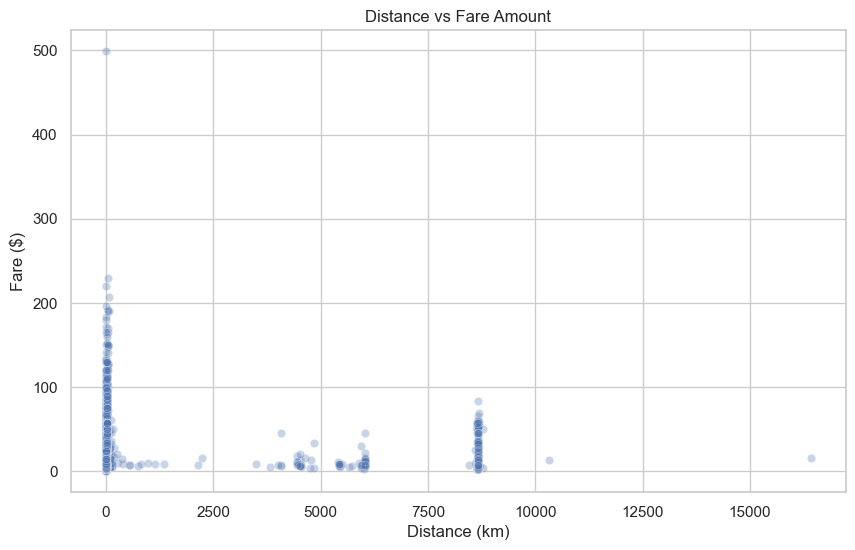

In [11]:
if 'df' in locals():
    # 1. Outlier Check - Fare Amount
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df['fare_amount'])
    plt.title("Boxplot of Fare Amount")
    plt.show()

    # 2. Correlation Heatmap
    plt.figure(figsize=(10, 8))
    cols = ['fare_amount', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'distance_km']
    sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
    
    # 3. Distance vs Fare Scatter
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='distance_km', y='fare_amount', data=df, alpha=0.3)
    plt.title("Distance vs Fare Amount")
    plt.xlabel("Distance (km)")
    plt.ylabel("Fare ($)")
    plt.show()

In [12]:
if 'df' in locals():
    features = ['passenger_count', 'hour', 'day', 'month', 'weekday', 'distance_km']
    X = df[features]
    y = df['fare_amount']

    # 80-20 Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardization (crucial for PCA)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("Data ready for PCA and Modeling.")

Data ready for PCA and Modeling.


In [13]:
if 'df' in locals():
    # Retain 95% of variance
    pca = PCA(n_components=0.95, random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    print(f"Original features: {X_train_scaled.shape[1]}")
    print(f"PCA components retained: {pca.n_components_}")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Original features: 6
PCA components retained: 6
Explained variance ratio: [0.18143772 0.16947172 0.16887846 0.16662081 0.16386581 0.14972548]


In [14]:
if 'df' in locals():
    print("Training models...")
    
    models = {
        "Linear Reg (No PCA)": LinearRegression(),
        "Linear Reg (With PCA)": LinearRegression(),
        # Limited estimators for speed, increase to 100 for better results
        "Random Forest (No PCA)": RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1),
        "Random Forest (With PCA)": RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1)
    }

    # Fit models
    models["Linear Reg (No PCA)"].fit(X_train_scaled, y_train)
    models["Linear Reg (With PCA)"].fit(X_train_pca, y_train)
    models["Random Forest (No PCA)"].fit(X_train_scaled, y_train)
    models["Random Forest (With PCA)"].fit(X_train_pca, y_train)
    
    print("Training complete.")

Training models...
Training complete.


,Model,R2 Score,RMSE,MAE
2,Random Forest (No PCA),0.747750,4.951096,2.498385
3,Random Forest (With PCA),0.426314,7.466601,4.274648
1,Linear Reg (With PCA),0.001974,9.848201,6.052962
0,Linear Reg (No PCA),0.001974,9.848201,6.052962


C:\Users\acer_\AppData\Local\Temp\ipykernel_10480\3604519183.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2 Score", y="Model", data=results_df, palette="viridis")


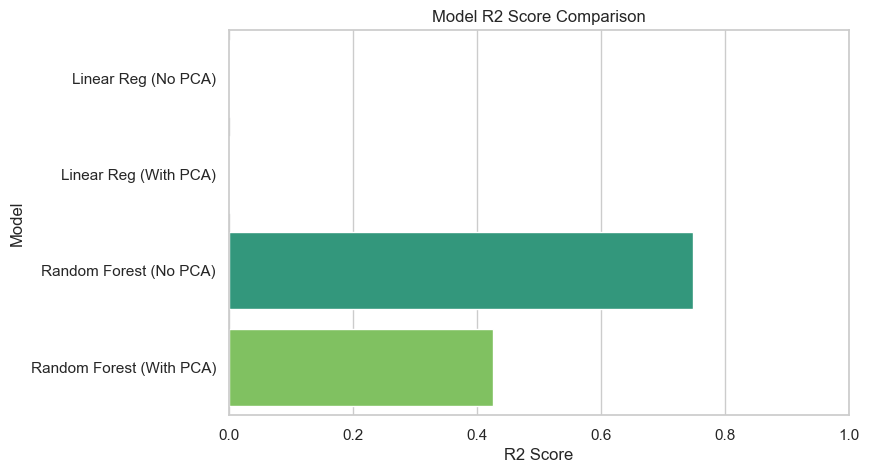

In [15]:
if 'df' in locals():
    def get_metrics(y_true, y_pred):
        return {
            "RMSE": sqrt(mean_squared_error(y_true, y_pred)),
            "MAE": mean_absolute_error(y_true, y_pred),
            "R2": r2_score(y_true, y_pred)
        }

    results = []
    for name, model in models.items():
        # Select correct test set (PCA vs Scaled)
        X_eval = X_test_pca if "(With PCA)" in name else X_test_scaled
        y_pred = model.predict(X_eval)
        
        m = get_metrics(y_test, y_pred)
        results.append([name, m["R2"], m["RMSE"], m["MAE"]])

    # Show results
    results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE", "MAE"])
    display(results_df.sort_values(by="R2 Score", ascending=False))

    # Plot R2 Comparison
    plt.figure(figsize=(8, 5))
    sns.barplot(x="R2 Score", y="Model", data=results_df, palette="viridis")
    plt.title("Model R2 Score Comparison")
    plt.xlim(0, 1)
    plt.show()